In [139]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
anyio                        4.0.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.13.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.16.0
charset-normalizer           3.3.1
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
et-xmlfile                   1.1.0
exceptiongroup               1.1.3



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Getting Data From Online 

In [379]:
import tensorflow as tf
import os


In [381]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Remove Dodgy Images and Check for Invalide File Types

In [382]:
import cv2
import imghdr
from matplotlib import pyplot as plt


In [383]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
image_exts


['jpeg', 'jpg', 'bmp', 'png']

In [384]:
os.listdir(os.path.join(data_dir, 'commercial'))

['100 (1).jpeg',
 '100 (1).jpg',
 '100 (10).jpeg',
 '100 (11).jpeg',
 '100 (12).jpeg',
 '100 (13).jpeg',
 '100 (14).jpeg',
 '100 (15).jpeg',
 '100 (16).jpeg',
 '100 (17).jpeg',
 '100 (18).jpeg',
 '100 (19).jpeg',
 '100 (2).jpeg',
 '100 (2).jpg',
 '100 (20).jpeg',
 '100 (3).jpeg',
 '100 (3).jpg',
 '100 (4).jpeg',
 '100 (4).jpg',
 '100 (5).jpeg',
 '100 (6).jpeg',
 '100 (7).jpeg',
 '100 (8).jpeg',
 '100 (9).jpeg',
 '3d-render-of-shopping-mall-interior.jpg',
 'ai-generated-8202874_1280.jpg',
 'airport-4715294_640.jpg',
 'architecture-1235570_1280.jpg',
 'architecture-1815863_640.jpg',
 'architecture-3036697_1280.jpg',
 'architecture-721878_1280.jpg',
 'asphalt-1868569_1280.jpg',
 'beijing-galaxy-soho-6340809_1280.jpg',
 'beijing-galaxy-soho-6340812_1280.jpg',
 'beijing-galaxy-soho-6340815_640.jpg',
 'building-4336443_1280.jpg',
 'building-4336471_640.jpg',
 'building-4339962_640.jpg',
 'building-4442068_1280.jpg',
 'building-4758347_640.jpg',
 'building-4797175_1280.jpg',
 'building-567836

In [385]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

100 (1).jpeg
100 (1).jpg
100 (10).jpeg
100 (11).jpeg
100 (12).jpeg
100 (13).jpeg
100 (14).jpeg
100 (15).jpeg
100 (16).jpeg
100 (17).jpeg
100 (18).jpeg
100 (19).jpeg
100 (2).jpeg
100 (2).jpg
100 (20).jpeg
100 (3).jpeg
100 (3).jpg
100 (4).jpeg
100 (4).jpg
100 (5).jpeg
100 (6).jpeg
100 (7).jpeg
100 (8).jpeg
100 (9).jpeg
3d-render-of-shopping-mall-interior.jpg
ai-generated-8202874_1280.jpg
airport-4715294_640.jpg
architecture-1235570_1280.jpg
architecture-1815863_640.jpg
architecture-3036697_1280.jpg
architecture-721878_1280.jpg
asphalt-1868569_1280.jpg
beijing-galaxy-soho-6340809_1280.jpg
beijing-galaxy-soho-6340812_1280.jpg
beijing-galaxy-soho-6340815_640.jpg
building-4336443_1280.jpg
building-4336471_640.jpg
building-4339962_640.jpg
building-4442068_1280.jpg
building-4758347_640.jpg
building-4797175_1280.jpg
building-5678361_640.jpg
busy-shopping-mall.jpg
christmas-4713985_1280.jpg
christmas-4713989_640.jpg
city-5132735_1280.jpg
close-up-view-of-empty-billboard-in-shopping-mall-with-blu

In [386]:
img = cv2.imread(os.path.join('data', 'residential', 'door-1756960_1280.png'))

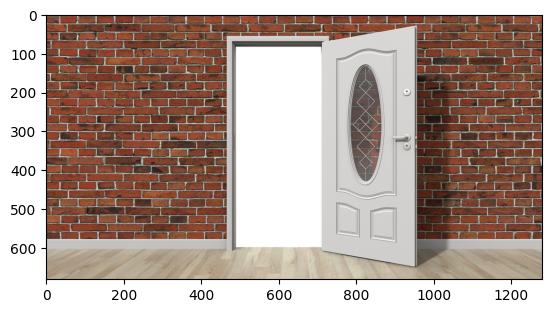

In [387]:
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [391]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Use Keras to Load Data

In [389]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [390]:
import numpy as np
from matplotlib import pyplot as plt


In [392]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 852 files belonging to 2 classes.


In [393]:
#cannot grab data directily, this is a generator
data_iterator = data.as_numpy_iterator()

In [394]:
#gets another batch from generator(batch size is 32 but can easily alter size of batch)
batch = data_iterator.next()

In [395]:
#Images as numpy array
batch[0].shape

(32, 256, 256, 3)

In [396]:
#dictates either commercial(0) or residential(1)
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [397]:
scaled = batch[0]/255
scaled.max()

1.0

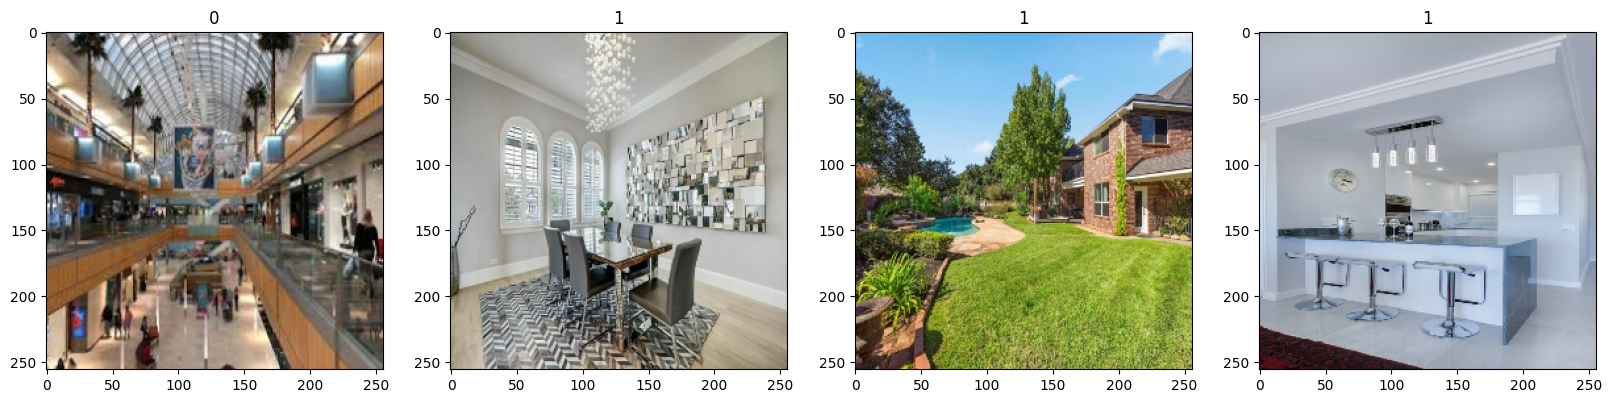

In [398]:
fig, ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess, Train Data

In [399]:
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()


In [400]:
batch[0].max()

1.0

In [401]:
batch

(array([[[[0.73785233, 0.56138176, 0.39667585],
          [0.61510414, 0.4386336 , 0.2739277 ],
          [0.56524205, 0.38877144, 0.22406556],
          ...,
          [0.24957108, 0.25349265, 0.26917893],
          [0.2359375 , 0.23265931, 0.25194547],
          [0.25055146, 0.24662991, 0.26623774]],
 
         [[0.5952139 , 0.41887107, 0.25643742],
          [0.6376255 , 0.46544388, 0.3009296 ],
          [0.6217097 , 0.4458779 , 0.28318873],
          ...,
          [0.2212186 , 0.22514017, 0.24082644],
          [0.20790441, 0.20462623, 0.22391237],
          [0.2247906 , 0.22086902, 0.24047688]],
 
         [[0.4703215 , 0.29534447, 0.13701116],
          [0.58484817, 0.4168564 , 0.25503042],
          [0.639588  , 0.46546882, 0.30670658],
          ...,
          [0.19267261, 0.19659418, 0.21228045],
          [0.18109912, 0.17782094, 0.19710708],
          [0.20087649, 0.19695492, 0.21656276]],
 
         ...,
 
         [[0.7817615 , 0.75823206, 0.7084006 ],
          [0.77900

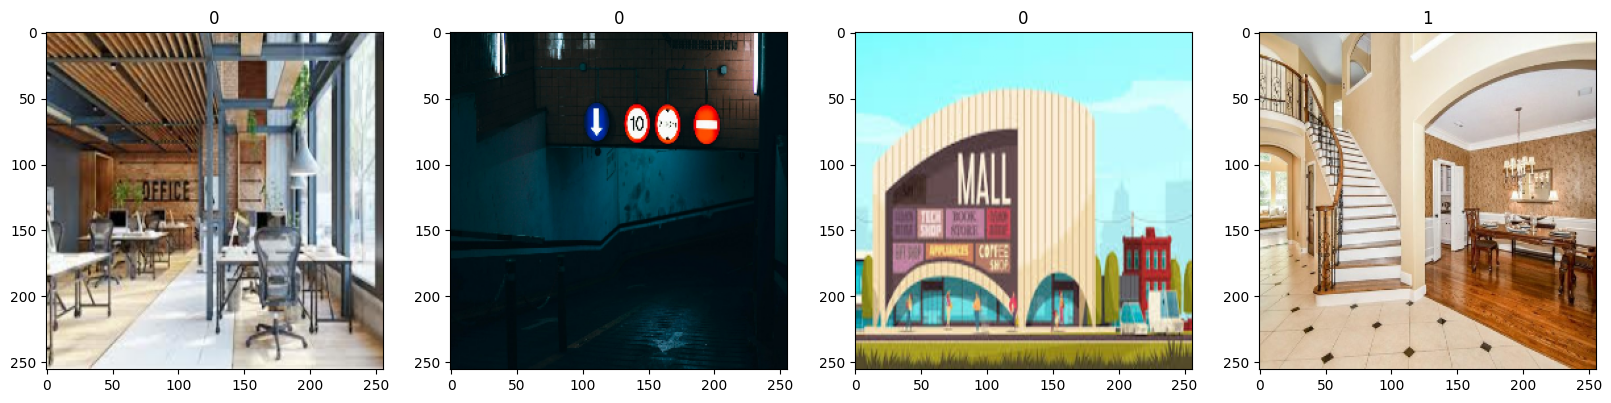

In [402]:
fig, ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [403]:
len(data)

27

In [406]:
#training data used for training model, validation data used validation model(fine tune), final state is test data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [407]:
test_size+val_size+train_size

27

In [408]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learing Model

In [409]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [410]:
model = Sequential()

In [411]:
model.add(Conv2D(16, (3,3), 1, activation= 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))


In [412]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [413]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

Train/Log our data

In [414]:
logdir = 'logs'

In [415]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [416]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
18/18 [==============================] - 18s 860ms/step - loss: 0.6337 - accuracy: 0.7795 - val_loss: 0.5168 - val_accuracy: 0.7917
Epoch 2/20
18/18 [==============================] - 12s 659ms/step - loss: 0.5155 - accuracy: 0.7882 - val_loss: 0.5427 - val_accuracy: 0.7396
Epoch 3/20
18/18 [==============================] - 12s 654ms/step - loss: 0.5299 - accuracy: 0.7812 - val_loss: 0.4924 - val_accuracy: 0.7708
Epoch 4/20
18/18 [==============================] - 12s 630ms/step - loss: 0.4702 - accuracy: 0.7899 - val_loss: 0.4931 - val_accuracy: 0.7552
Epoch 5/20
18/18 [==============================] - 12s 613ms/step - loss: 0.3939 - accuracy: 0.8264 - val_loss: 0.4197 - val_accuracy: 0.8281
Epoch 6/20
18/18 [==============================] - 14s 772ms/step - loss: 0.4025 - accuracy: 0.8385 - val_loss: 0.4065 - val_accuracy: 0.8073
Epoch 7/20
18/18 [==============================] - 18s 973ms/step - loss: 0.3283 - accuracy: 0.8750 - val_loss: 0.3239 - val_accuracy: 0.8802

In [417]:
hist.history

{'loss': [0.6336872577667236,
  0.5155091881752014,
  0.5298807621002197,
  0.4701625108718872,
  0.3939283490180969,
  0.40247154235839844,
  0.3282760977745056,
  0.27921268343925476,
  0.20764008164405823,
  0.20802998542785645,
  0.15871360898017883,
  0.124269500374794,
  0.07871416211128235,
  0.07399308681488037,
  0.0659577026963234,
  0.054999154061079025,
  0.06855025887489319,
  0.04958193004131317,
  0.04688560217618942,
  0.04789027199149132],
 'accuracy': [0.7795138955116272,
  0.7881944179534912,
  0.78125,
  0.7899305820465088,
  0.8263888955116272,
  0.8385416865348816,
  0.875,
  0.9010416865348816,
  0.9288194179534912,
  0.9305555820465088,
  0.9427083134651184,
  0.9548611044883728,
  0.9756944179534912,
  0.9826388955116272,
  0.9826388955116272,
  0.9861111044883728,
  0.9756944179534912,
  0.9878472089767456,
  0.9895833134651184,
  0.9878472089767456],
 'val_loss': [0.5168473124504089,
  0.5426810383796692,
  0.4924454987049103,
  0.4931422472000122,
  0.419748

Plotting our peformance


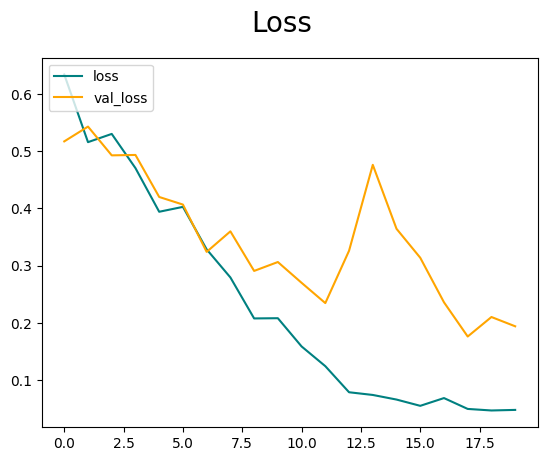

In [418]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Final Step- Evaluate Peformance

In [419]:
from tensorflow import keras
from keras.metrics import Precision, Recall, BinaryAccuracy


In [420]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [421]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 140ms/step


In [422]:
print(f'Precision:{pre.result().numpy}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

Precision:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>, Recall:0.9682539701461792, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.97619045>>


Test

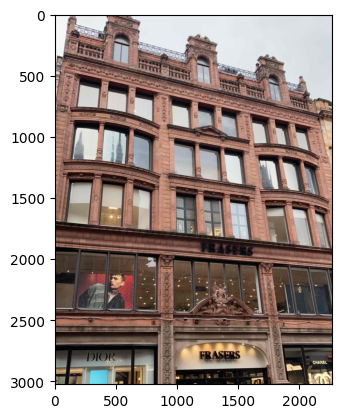

In [442]:
img = cv2.imread('Commercial-Ext_3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


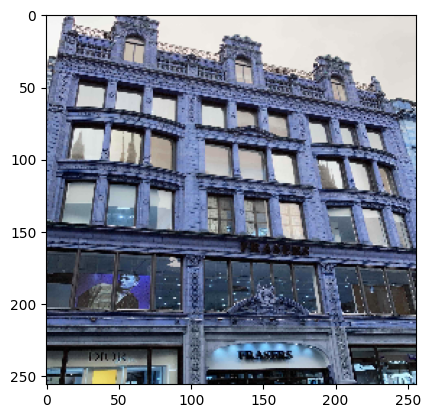

In [443]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [444]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [445]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 36ms/step


In [446]:
yhat

array([[0.92625636]], dtype=float32)

In [447]:
if yhat > 0.5:
    print(f'Predicted estate is residential')
else:
    print(f'Predicted estate is commercial')

Predicted estate is residential


Save Model


In [284]:
from tensorflow import keras
from keras.models import load_model

In [448]:
model.save(os.path.join('models', 'CommercialResidentialF.h5'))

c:\Users\jy3df\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [453]:
os.path.join('models', 'CommercialResidentialF.h5')

'models\\CommercialResidentialF.h5'

In [454]:
new_model = load_model(os.path.join('models', 'CommercialResidentialF.h5'))

In [455]:
yhatnew = new_model.predict(np.expand_dims(resize/255),0)

In [ ]:
if yhatnew > 0.5:
    print(f'Predicted estate is residential')
else:
    print(f'Predicted estate is commercial')